<a href="https://colab.research.google.com/github/dettm/5525-final-project/blob/main/Spam_Collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
import re
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

import numpy as np
from collections import Counter
import time
from statistics import mean

from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv (r'/content/drive/MyDrive/Colab Notebooks/NLP/spam.csv', encoding= "latin-1")

In [ ]:
## Another dataset, may be we could use different dataset just to add complexity in our project and compare the results between them ?
# This file is in the spambase folder, data description can be found in the same folder in README file.

spambase_dataset= pd.read_csv (r'/content/drive/MyDrive/Colab Notebooks/NLP/spambase/data/spambase_csv.csv', encoding= "latin-1")

In [ ]:
spambase_dataset

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df=df.dropna(axis=1)

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df= df.rename(columns={"v1": "label", "v2": "text"})

In [ ]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
## number of spam labeled text
len(df[df.label=="spam"])

747

In [ ]:
## number of ham labeled text
len(df[df.label=="ham"])

4825

In [ ]:
#missing values
df.isnull().sum()

label    0
text     0
dtype: int64

**Feature Engineering**

In [ ]:
#Text length
def text_length(text):
  return len(text)- text.count(" ")

df['text_length']= df.text.apply(lambda x: text_length(x))

In [ ]:
# Count Punctuation percentage

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3) * 100


df['punctuation']= df.text.apply(lambda x: count_punct(x))

In [ ]:
df

,label,text,text_length,punctuation
0,ham,"Go until jurong point, crazy.. Available only ...",92,9.8
1,ham,Ok lar... Joking wif u oni...,24,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
3,ham,U dun say so early hor... U c already then say...,39,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,132,6.1
5568,ham,Will Ì_ b going to esplanade fr home?,30,6.7
5569,ham,"Pity, * was in mood for that. So...any other s...",48,14.6
5570,ham,The guy did some bitching but I acted like i'd...,100,1.0


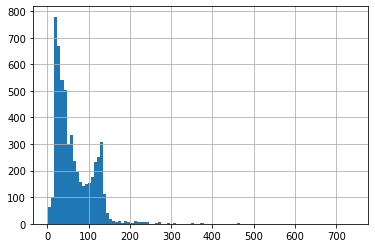

In [ ]:
df['text_length'].hist(bins=100)

**Analyzing data**

In [ ]:
# convert text to lower case, later can be tokenized
df['processed_text'] = df['text'].str.lower()

In [ ]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
df["processed_text"] = df['processed_text'].apply(remove_punctuations)

In [ ]:
df

,label,text,text_length,punctuation,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",92,9.8,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,24,25.0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,39,15.4,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1,nah i dont think he goes to usf he lives aroun...
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,132,6.1,this is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,30,6.7,will ì b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",48,14.6,pity was in mood for that soany other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,100,1.0,the guy did some bitching but i acted like id ...


In [ ]:
# remove the stopwords, may need to define our own stopwords later
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')

df["processed_text"]= df["processed_text"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df

,label,text,text_length,punctuation,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",92,9.8,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,24,25.0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,39,15.4,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1,nah dont think goes usf lives around though
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,132,6.1,2nd time tried 2 contact u u å£750 pound prize...
5568,ham,Will Ì_ b going to esplanade fr home?,30,6.7,ì b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",48,14.6,pity mood soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,100,1.0,guy bitching acted like id interested buying s...


In [ ]:
other_stopwords= ['u', 'im', '2', 'ur', 'ill', '4', 'lor', 'r', 'n', 'da', 'oh']

In [ ]:
df["processed_text"]= df["processed_text"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in other_stopwords))

In [ ]:
df

,label,text,text_length,punctuation,processed_text
0,ham,"Go until jurong point, crazy.. Available only ...",92,9.8,go jurong point crazy available bugis great wo...
1,ham,Ok lar... Joking wif u oni...,24,25.0,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7,free entry wkly comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,39,15.4,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1,nah dont think goes usf lives around though
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,132,6.1,2nd time tried contact å£750 pound prize claim...
5568,ham,Will Ì_ b going to esplanade fr home?,30,6.7,ì b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",48,14.6,pity mood soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,100,1.0,guy bitching acted like id interested buying s...


In [ ]:
# tokenize text
import nltk
nltk.download('punkt')
df['processed_text'] = df.apply(lambda row: nltk.word_tokenize(row['processed_text']), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Collect ham words
ham_words = list(df.loc[df.label == 'ham', 'processed_text'])

# Flatten list of lists
ham_words = list(np.concatenate(ham_words).flat)

# Create dictionary to store word frequency
ham_words = Counter(ham_words)

In [ ]:
# Collect spam words
spam_words = list(df.loc[df.label == 'spam', 'processed_text'])

# Flatten list of lists
spam_words= list(np.concatenate(spam_words).flat)

# Create dictionary to store word frequency
spam_words = Counter(spam_words)

In [ ]:
# 50 most common ham words
ham_words = list(df.loc[df.label == 'ham', 'processed_text'])
ham_words = list(np.concatenate(ham_words).flat)
ham_words = Counter(ham_words)
ham_words = pd.DataFrame(ham_words.most_common(50), columns = ['ham_word', 'frequency'])

In [ ]:
# 50 most common spam words
spam_words = list(df.loc[df.label == 'spam', 'processed_text'])
spam_words = list(np.concatenate(spam_words).flat)
spam_words = Counter(spam_words)
spam_words = pd.DataFrame(spam_words.most_common(50), columns = ['spam_word', 'frequency'])

Plot most common ham and spam words

Text(0, 0.5, 'frequency')

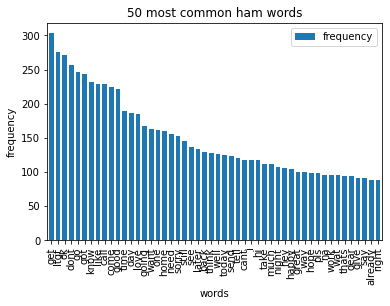

In [ ]:
ham_words.plot(x="ham_word", y="frequency", kind="bar", width=0.7, align='center')

plt.title("50 most common ham words")
plt.xlabel("words")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

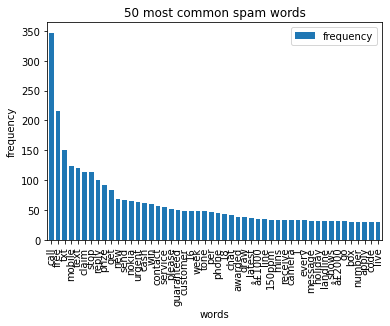

In [ ]:
spam_words.plot(x="spam_word", y="frequency", kind="bar", width=0.7, align='center')

plt.title("50 most common spam words")
plt.xlabel("words")
plt.ylabel("frequency")

In [ ]:
result = pd.concat([ham_words, spam_words], axis=1, join='inner')

In [ ]:
## 50 most common ham and spam words with frequency
result

,ham_word,frequency,spam_word,frequency
0,get,303,call,347
1,ltgt,276,free,216
2,ok,272,txt,150
3,dont,257,mobile,123
4,go,247,text,120
5,got,243,claim,113
6,know,232,stop,113
7,like,229,reply,101
8,call,229,prize,92
9,come,224,get,83


# **Make data ready for modeling**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[['text', 'text_length', 'punctuation']], df.label, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4457, 3), (1115, 3), (4457,), (1115,))

In [ ]:
# TfidfVectorizer, can be used other vectorization process
tfidf_vect = TfidfVectorizer()
tfidf_vect_fit = tfidf_vect.fit(x_train['text'])

tfidf_train = tfidf_vect.transform(x_train['text'])
tfidf_test = tfidf_vect.transform(x_test['text'])

# Recombine transformed body text with body_len and punct% features
x_train = pd.concat([x_train[['text_length', 'punctuation']].reset_index(drop = True), pd.DataFrame(tfidf_train.toarray())], axis = 1)
x_test = pd.concat([x_test[['text_length', 'punctuation']].reset_index(drop = True), pd.DataFrame(tfidf_test.toarray())], axis = 1)

# **Gradient Boosting**

In [ ]:
## rather than using just one iteration, using 5 iteration and average the accuracy result for better result

gb_accuracy=[]
total_time=[]
for i in range(5):
  model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train, y_train)

  start_time= time.time()
  model.score(x_test, y_test)
  end_time= time.time()

  total_time.append(end_time-start_time)

  y_pred= model.predict(x_test)
  gb_accuracy.append(accuracy_score(y_test, y_pred) * 100)

avg_gb_accuracy= np.mean(gb_accuracy)
avg_time= np.mean(total_time)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98       965
        spam       0.92      0.82      0.87       150

    accuracy                           0.97      1115
   macro avg       0.95      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
print("accuracy of gradient boosting is: ", avg_gb_accuracy)
print("total run time: ", avg_time)

accuracy of gradient boosting is:  96.68161434977578
total run time:  0.2666934490203857


# **Random Forest Classifier**

In [ ]:
rf_accuracy=[]
total_time=[]
for i in range(5):
  model = RandomForestClassifier(max_depth=100, random_state=42)

  start_time= time.time()
  model.fit(x_test, y_test)
  end_time= time.time()

  total_time.append(end_time-start_time)

  y_pred= model.predict(x_test)
  rf_accuracy.append(accuracy_score(y_test, y_pred) * 100)

avg_rf_accuracy= np.mean(rf_accuracy)
avg_time= np.mean(total_time)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       965
        spam       1.00      0.99      0.99       150

    accuracy                           1.00      1115
   macro avg       1.00      0.99      1.00      1115
weighted avg       1.00      1.00      1.00      1115



In [ ]:
print("accuracy of random forest is: ", avg_rf_accuracy)
print("total run time: ", avg_time)

accuracy of random forest is:  99.82062780269058
total run time:  1.37432918548584


# **Support Vector Machine (SVM)**

In [ ]:
svm_accuracy=[]
total_time=[]
for i in range(5):
  model = svm.SVC()

  start_time= time.time()
  model.fit(x_test, y_test)
  end_time= time.time()

  total_time.append(end_time-start_time)
  y_pred= model.predict(x_test)
  svm_accuracy.append(accuracy_score(y_test, y_pred) * 100)

avg_svm_accuracy= np.mean(svm_accuracy)
avg_time= np.mean(total_time)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       965
        spam       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("accuracy of svm is: ", avg_svm_accuracy)
print("total run time: ", avg_time)

accuracy of svm is:  86.54708520179372
total run time:  3.1031020641326905
